

---
# **<center>Federate Project</cenyter> <center>Stellar Phenomena A Fusion of Classification and Clustering Methods</center>  <center>By Jebali Wafa</center>**




> ***Bring your spaceship—it's our ride to the stars***</span>



---



![](https://www.stsci.edu/files/live/sites/www/files/home/hst/_images/Westerlund2-Cropped-001.jpg?t=tn2400)


### **Plan**
1. **Imports of Libraries**
2. **Load Dataset**
3. **EDA**
   - 3.1. Initial Data Inspection
   - 3.2. Scatter Plot: Hertzsprung-Russell Diagram
   - 3.3. Boxplots: Feature Distributions by Star Type
4. **Data Preprocessing**
   - 4.1. Check for Null Values
   - 4.2. Encoding Categorical Variables
   - 4.3. Data Preparation and Splitting
   - 4.4. Feature Scaling with StandardScaler
5. **Models Building & Evaluation**
   - 5.1. Classification
     - 5.1.1. Building K Nearest centroid from scratch
     - 5.1.2. Implementing K Nearest Centroid from Scratch
     - 5.1.3. Nearest centroid predictions visualization using PCA for dimension reduction
     - 5.1.4. Classification Report from Scratch
     - 5.1.5. Confusion Matrix
   - 5.2. Clustering
     - 5.2.1. Building KMeans from scratch
     - 5.2.2. Implementing KMeans from Scratch
     - 5.2.3. KMeans predictions visualization using PCA for dimension reduction
     - 5.2.4. V-measure score implementation
   - 5.3. Hybrid Approach: Combining kNN Centroid and K-Means Algorithms
     - 5.3.1. Building KMeansKNNClassifier from scratch
     - 5.3.2. Implementing the KMeansKNNClassifier from Scratch
     - 5.3.3. Evaluation using classification report & accuracy
     - 5.3.4. Hybrid Model's predictions visualization using PCA for dimension reduction


### **Imports of Libraries**

In [ ]:
!pip install cassandra-driver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 39.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  **Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/stars_class.csv')

## **EDA**

**Initial Data Inspection**

In [ ]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
df.describe(include="all")

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240,240
unique,NaN,NaN,NaN,NaN,NaN,19,7
top,NaN,NaN,NaN,NaN,NaN,Red,M
freq,NaN,NaN,NaN,NaN,NaN,112,111
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,NaN,NaN
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,NaN,NaN
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,NaN,NaN
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,NaN,NaN
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,NaN,NaN
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,NaN,NaN


**Scatter Plot : Hertzsprung-Russell Diagram** : It is a crucial plot for understanding stellar evolution, identifying star types (such as main sequence, giants, supergiants, and white dwarfs), and studying their properties in astrophysics

<center><img src="https://www.eso.org/public/archives/images/screen/eso0728c.jpg" width="300"></center>


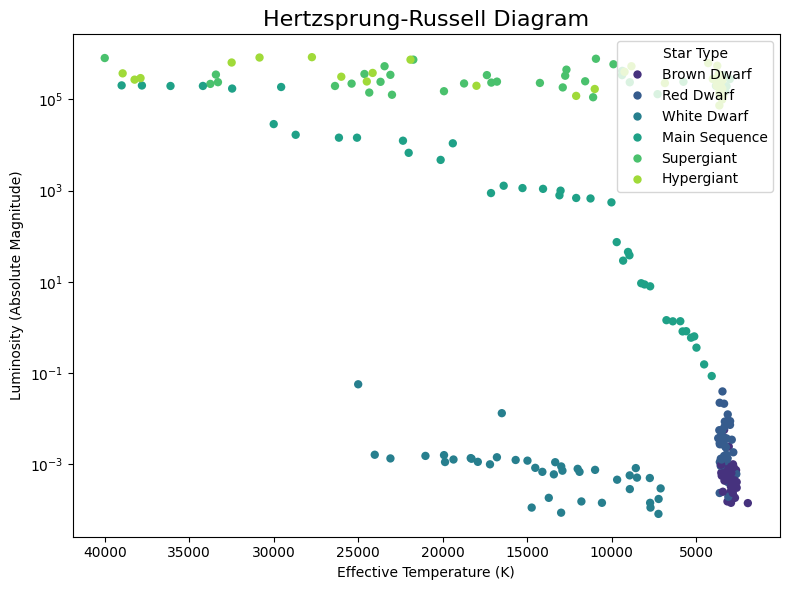

In [ ]:
star_type_mapping = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}


temperature = df['Temperature (K)']
luminosity = df['Luminosity(L/Lo)']
star_type = df['Star type'].replace(star_type_mapping)

# Create a scatter plot with color-coded star types
plt.figure(figsize=(8, 6))
sns.scatterplot(x=temperature, y=luminosity, hue=star_type, palette='viridis', alpha=1, edgecolor='none')

# Log scale for luminosity
plt.yscale('log')

# Customize labels and title
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Absolute Magnitude)')
plt.title('Hertzsprung-Russell Diagram', fontsize=16)

# Add legend
plt.legend(title='Star Type', loc='upper right')

# Reverse the temperature axis (hotter stars on the left)
plt.gca().invert_xaxis()


# Show the plot
plt.tight_layout()
plt.show()


**Boxplots** : Feature Distributions by Star Type

<Figure size 500x300 with 0 Axes>

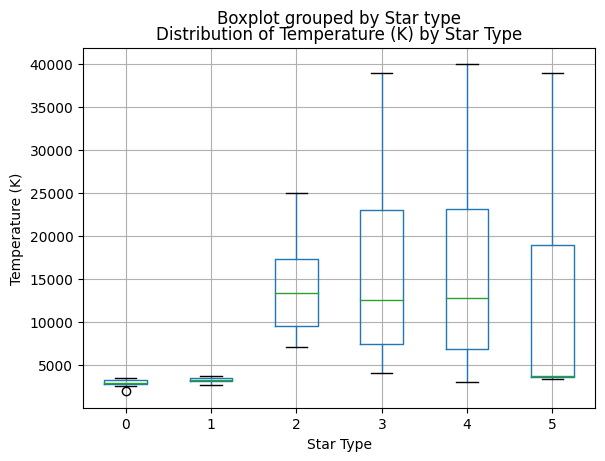

<Figure size 500x300 with 0 Axes>

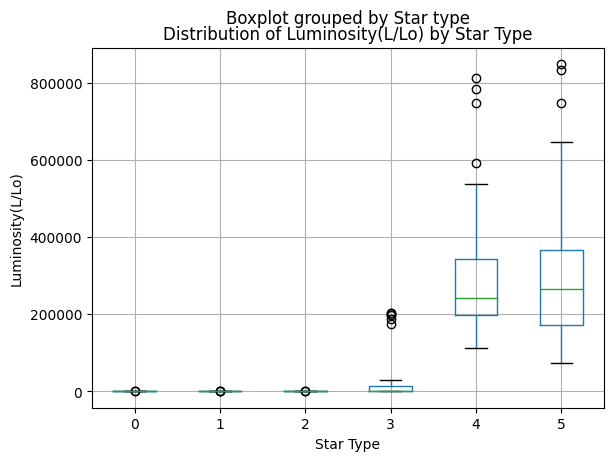

<Figure size 500x300 with 0 Axes>

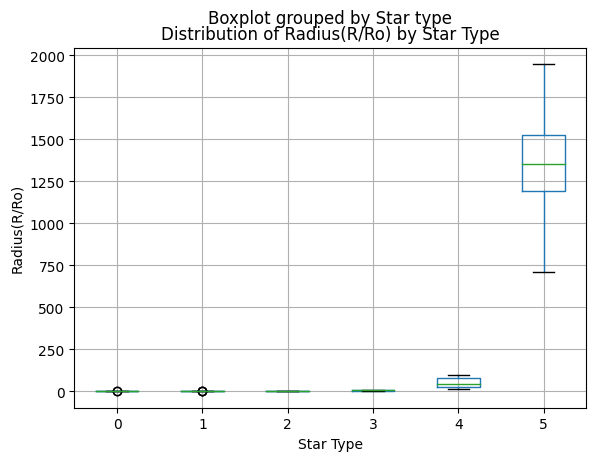

<Figure size 500x300 with 0 Axes>

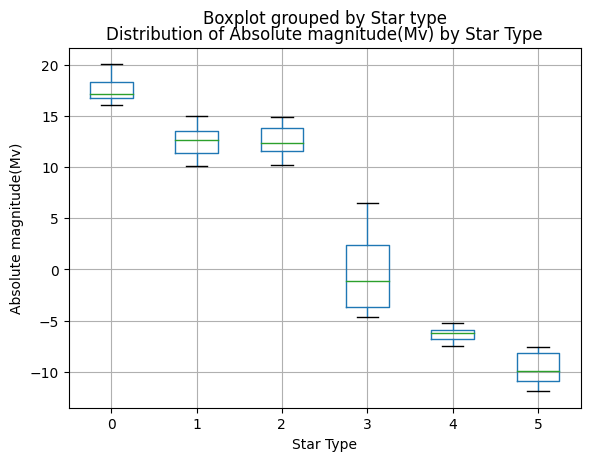

In [ ]:
# Extract features (excluding 'Star Type' column)
df_features = df.drop(columns=['Star type','Star color','Spectral Class'])

# Plot boxplots for each feature
for col in df_features:
    plt.figure(figsize=(5, 3))
    df.boxplot(column=col, by='Star type')
    plt.xlabel('Star Type')
    plt.ylabel(col)
    plt.title(f'Distribution of {col} by Star Type')
    plt.show()


## **Data Preprocessing**

**Check for null values** :

In [ ]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

**Encoding Categorical Variables** :

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Spectral Class
df['Spectral Class'] = label_encoder.fit_transform(df['Spectral Class'])

# Encode Star color
df['Star color'] = label_encoder.fit_transform(df['Star color'])
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


**Data Preparation and Splitting** :

In [ ]:
X = df.drop('Star type', axis=1)
y = df['Star type']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling with StandardScaler** :

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Models Building & Evaluation**

### **Classification**

**Building K Nearest centroid from scratch** :

In [ ]:
class KNNCentroidClassifier:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance
        self.centroids = {}

    def fit(self, X, y):
        # Group data by class and calculate centroids
        for class_label in np.unique(y):
            self.centroids[class_label] = np.mean(X[y == class_label], axis=0)

    def predict(self, X):
      predictions = []
      for point in X:
          # Calculate distances to centroids based on the chosen metric
          distances = {}
          for class_label in self.centroids:
              if self.distance == 'manhattan':
                  distances[class_label] = np.sum(np.abs(point - self.centroids[class_label]))
              else:  # Default to euclidean distance
                  distances[class_label] = np.linalg.norm(point - self.centroids[class_label])

          # Find the k nearest centroids
          k_nearest_centroids = sorted(distances, key=distances.get)[:self.k]

          # Assign the class of the majority of the k nearest centroids
          predicted_class = max(k_nearest_centroids, key=k_nearest_centroids.count)

          predictions.append(predicted_class)
      return predictions



**Implementing K Nearest Centroid from Scratch** :

In [ ]:
classifier = KNNCentroidClassifier(k=4, distance='euclidean')
classifier.fit(X_train, y_train)
y_pred_scratch = classifier.predict(X_test)

**Nearest centroid predictions visualization using PCA for dimension reduction**

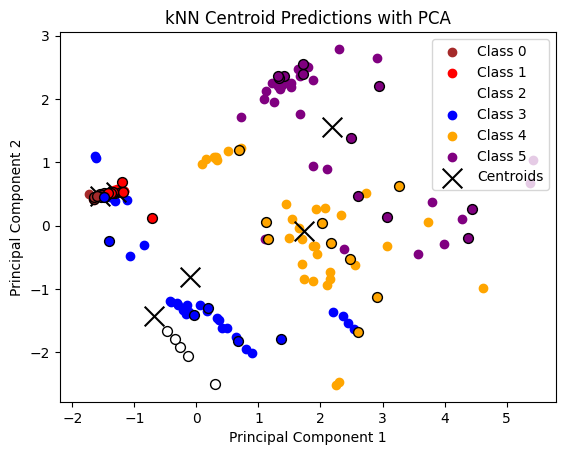

In [ ]:
def plot_knn_centroid_predictions_with_pca(X_train, y_train, X_test, y_pred, centroids):
    # Perform PCA on the training data
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)

    # Transform the test data using the same PCA
    X_test_pca = pca.transform(X_test)

    colors = ['brown', 'red', 'white', 'blue', 'orange', 'purple']

    # Create a mapping of class labels to color indices
    class_labels = np.unique(y_train)
    color_map = {class_label: colors[i] for i, class_label in enumerate(class_labels)}

    # Plot training points
    for class_label in class_labels:
        plt.scatter(X_train_pca[y_train == class_label][:, 0], X_train_pca[y_train == class_label][:, 1], c=color_map[class_label], label=f'Class {class_label}')

    # transform centroids using PCA
    centroids_pca = pca.transform(list(centroids.values()))

    # Plotting the centroids
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, color='k', label='Centroids')
    # Plot test points with predictions
    for i, point in enumerate(X_test_pca):
        plt.scatter(point[0], point[1], c=color_map[y_pred[i]], edgecolors='k', marker='o', s=50)

    plt.title('kNN Centroid Predictions with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


plot_knn_centroid_predictions_with_pca(X_train, y_train, X_test, y_pred_scratch, classifier.centroids)


**Classification Report from Scratch** :

In [ ]:
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    n_classes = cm.shape[0]

    # Initialize metrics
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    f1_score = np.zeros(n_classes)
    support = np.zeros(n_classes)

    # Calculate metrics per class
    for i in range(n_classes):
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP

        precision[i] = TP / (TP + FP) if TP + FP != 0 else 0
        recall[i] = TP / (TP + FN) if TP + FN != 0 else 0
        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if precision[i] + recall[i] != 0 else 0
        support[i] = np.sum(y_true == i)  # Count occurrences of class i in y_true

    # Calculate global accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    # Calculate macro average and weighted average
    macro_avg = {
        'precision': np.mean(precision),
        'recall': np.mean(recall),
        'f1_score': np.mean(f1_score),
        'support': np.sum(support)
    }
    weighted_avg = {
        'precision': np.average(precision, weights=support),
        'recall': np.average(recall, weights=support),
        'f1_score': np.average(f1_score, weights=support),
        'support': np.sum(support)
    }

    # Compile the metrics into a list of tuples
    metrics_table = [
        ('Class', 'Precision', 'Recall', 'F1-score', 'Support'),
    ]
    for i in range(n_classes):
        metrics_table.append((
            f'class {i}',
            precision[i],
            recall[i],
            f1_score[i],
            support[i]
        ))
    # Add macro average and weighted average to the table
    metrics_table.append(('Macro Avg', macro_avg['precision'], macro_avg['recall'], macro_avg['f1_score'], macro_avg['support']))
    metrics_table.append(('Weighted Avg', weighted_avg['precision'], weighted_avg['recall'], weighted_avg['f1_score'], weighted_avg['support']))
    metrics_table.append(('Accuracy','','','',accuracy))

    # Print metrics as a table
    print(tabulate(metrics_table, headers='firstrow', tablefmt='grid'))

    # Compile the metrics into a dictionary
    metrics = {
        'class_metrics': {
            f'class {i}': {
                'precision': precision[i],
                'recall': recall[i],
                'f1_score': f1_score[i],
                'support': support[i]
            } for i in range(n_classes)
        },
        'accuracy': accuracy,
        'macro_avg': macro_avg,
        'weighted_avg': weighted_avg
    }

    return metrics

print(" Classification report :")
metrics = calculate_metrics(y_test, y_pred_scratch)


 Classification report :
+--------------+--------------------+--------------------+--------------------+-----------+
| Class        | Precision          | Recall             | F1-score           |   Support |
+==============+====================+====================+====================+===========+
| class 0      | 1.0                | 1.0                | 1.0                |  8        |
+--------------+--------------------+--------------------+--------------------+-----------+
| class 1      | 0.7777777777777778 | 1.0                | 0.8750000000000001 |  7        |
+--------------+--------------------+--------------------+--------------------+-----------+
| class 2      | 1.0                | 0.8333333333333334 | 0.9090909090909091 |  6        |
+--------------+--------------------+--------------------+--------------------+-----------+
| class 3      | 0.8333333333333334 | 0.625              | 0.7142857142857143 |  8        |
+--------------+--------------------+------------------

**Confusion Matrix** :

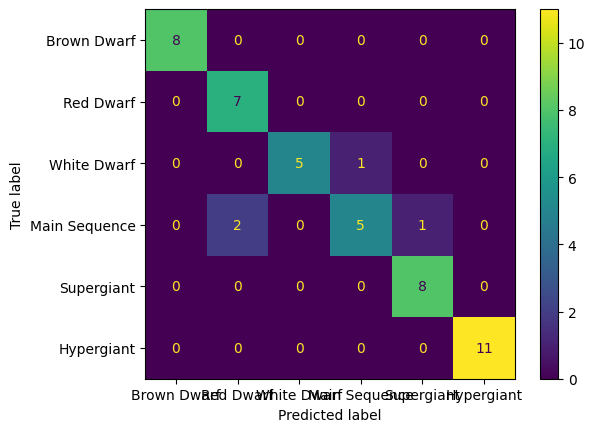

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_scratch)

# Create a confusion matrix visualization using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=star_type_mapping.values())

# Display the confusion matrix
disp.plot()
plt.show()


### **Clustering**

**Building KMeans from scratch** :

In [ ]:
df=scaler.fit_transform(df)

In [ ]:
class KMeans:
    def __init__(self, n_clusters=6, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = []

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance ,axis=1)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break

    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

**Implementing KMeans from Scratch** :

In [ ]:
kmeans = KMeans(n_clusters=6, max_iter=100, random_state=42)
kmeans.fit(df)
centroids = kmeans.centroids
y_pred = kmeans.labels

**KMeans predictions visualization using PCA for dimension reduction**

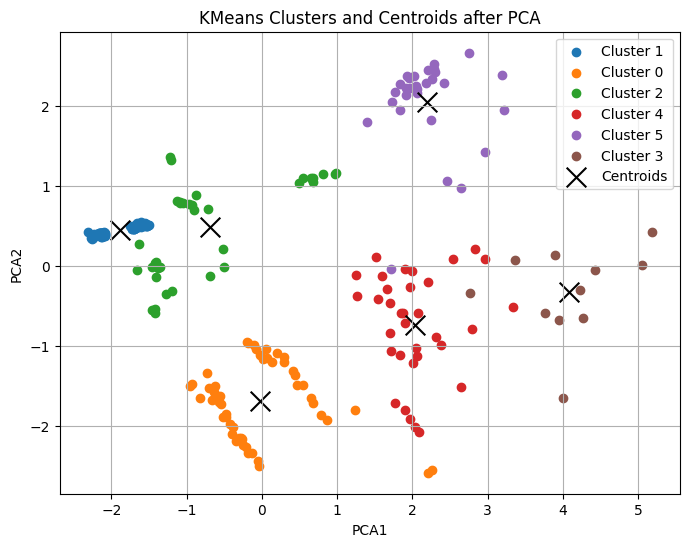

In [ ]:
# Applying PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)
pca_centroids = pca.transform(centroids)

# Creating a DataFrame for the PCA-transformed features
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

# Visualizing the clusters and centroids after PCA
plt.figure(figsize=(8, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
# Plotting the centroids
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], marker='x', s=200, color='k', label='Centroids')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clusters and Centroids after PCA')
plt.legend()
plt.grid(True)
plt.show()


**V-measure score implementation** :

In [ ]:
v_measure_score(y, y_pred)

0.6594351425209688

### **Hybrid Approach: Combining kNN Centroid and K-Means Algorithms** :
**Building KMeansKNNClassifier from scratch** :

In [ ]:
class KMeansKNNClassifier:
    def __init__(self, n_clusters=6, k=3, distance='euclidean', centroid_method='minimum', max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.k = k
        self.distance = distance
        self.centroid_method = centroid_method
        self.max_iter = max_iter
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=self.n_clusters, max_iter=self.max_iter, random_state=self.random_state)
        self.knn_centroid = KNNCentroidClassifier(k=self.k, distance=self.distance)

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

        # Fit KMeans model
        self.kmeans.fit(X)

        # Calculate centroids using KMeans
        kmeans_centroids = self.kmeans.centroids

        # Calculate centroids using KNNCentroidClassifier
        knn_centroids = self.knn_centroid.fit(X, y)

        # Select centroids based on the specified method
        combined_centroids = {}
        for i, kmeans_centroid in enumerate(kmeans_centroids):
            knn_centroid = self.knn_centroid.centroids[i]
            if self.centroid_method == 'minimum':
                combined_centroids[i] = np.minimum(kmeans_centroid, knn_centroid)
            elif self.centroid_method == 'mean':
                combined_centroids[i] = (kmeans_centroid + knn_centroid) / 2

        return combined_centroids

    def predict(self, X):
        # Call the fit method to get combined centroids
        predictions = []
        for x in X:
            nearest_centroid_label = None
            min_distance = float('inf')
            for label, centroid in combined_centroids.items():
                if self.distance == 'manhattan':
                    distance = np.sum(np.abs(x - centroid))
                else:  # Default to euclidean distance
                    distance = np.linalg.norm(x - centroid)
                if distance < min_distance:
                    min_distance = distance
                    nearest_centroid_label = label
            predictions.append(nearest_centroid_label)
        return predictions


**Implementing the KMeansKNNClassifier from Scratch :**



In [ ]:
# Initialize and fit the model
model = KMeansKNNClassifier(n_clusters=6, k=3, distance='euclidean', centroid_method='mean', max_iter=100, random_state=42)
combined_centroids = model.fit(X_train, y_train)
predictions = model.knn_centroid.predict(X_test)


**Evaluation using classification report & accuracy :**

In [ ]:
print(" Classification report :")
metrics = calculate_metrics(y_test, predictions)

 Classification report :
+--------------+--------------------+--------------------+--------------------+-----------+
| Class        | Precision          | Recall             | F1-score           |   Support |
+==============+====================+====================+====================+===========+
| class 0      | 1.0                | 1.0                | 1.0                |  8        |
+--------------+--------------------+--------------------+--------------------+-----------+
| class 1      | 0.7777777777777778 | 1.0                | 0.8750000000000001 |  7        |
+--------------+--------------------+--------------------+--------------------+-----------+
| class 2      | 1.0                | 0.8333333333333334 | 0.9090909090909091 |  6        |
+--------------+--------------------+--------------------+--------------------+-----------+
| class 3      | 0.8333333333333334 | 0.625              | 0.7142857142857143 |  8        |
+--------------+--------------------+------------------

**Hybrid Model's predictions visualization using PCA for dimension reduction**

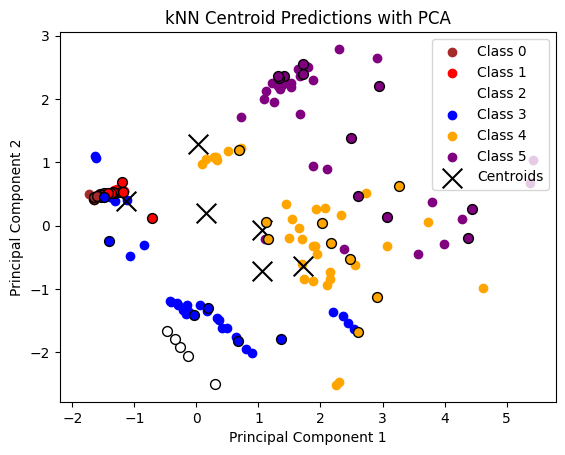

In [ ]:
plot_knn_centroid_predictions_with_pca(X_train, y_train, X_test, predictions,combined_centroids)